# Customer Transaction Prediction 

<img src="customer_transaction_image.jpg" width="">

# Contents
* PROBLEM STATEMENT
* DOMAIN ANALYSIS REPORT
* DATASET
* EDA
  - Univariate Analysis
* DATA PREPROCESSING
  - Handling Null Values
  - Handling Outliers
  - Scaling with MinMaxScaler
* FEATURE SELECTION
  - Heatmap
* PCA
  - Scree Plot
* MODEL CREATION
  - Train Test Split
  - Smoting Technique
* MODEL EVALUATION
  - Logistic Regression
  - K-Nearest Neighbor
  - Support Vector Machine
  - Decision Tree Classifier
  - Random Forest Classifier
  - Gradient Boosting
  - Xtreme Gradient Boosting
  - Artificial Neural Network
* MODEL COMPARISON REPORT
* DATA ANALYSIS REPORT 
* REPORT ON CHALLENGES FACED
* CONCLUSION


# Problem Statement

##### Task 1:-Prepare a complete data analysis report on the given data.

##### Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in future.


# Domain Analysis Report
In this dataset, comprising 200 anonymized features, the objective is to predict future customer transactions, regardless of the transaction amount. The target variable, represented by 0 and 1, denotes non-transaction and transaction, respectively. Through comprehensive feature analysis and correlation assessments, I aim to uncover patterns influencing transaction likelihood. There is no need for the EDA process as we dont have the column name. This report will bridge the gap between raw data and actionable strategies for predictive modeling.

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [3]:
data = pd.read_csv("cust_trans_pred.csv")
data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [4]:
pd.set_option('display.max_columns',None) # For displaying all the columns
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

* It appears that the dataset is quite large, with 200,000 rows and 201 columns. The target variable is named "target," and there are 200 feature variables (var_0 to var_199). The 'target' column seems to be binary, with values of 0 or 1. 

* The summary statistics provide information on the mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values for each variable.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
int_columns = data.select_dtypes(include='int').columns
print("Columns with integer data type:", int_columns)

Columns with integer data type: Index(['target'], dtype='object')


In [6]:
obj_columns = data.select_dtypes(include='object').columns
print("Columns with object data type:", obj_columns)

Columns with object data type: Index(['ID_code'], dtype='object')


In [7]:
float_columns = data.select_dtypes(include='float').columns
print("Columns with float data type:", float_columns)

Columns with float data type: Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)


* We can see that we have 3 datatypes in this dataset i.e. integer, float and object. the ID_code has object datatype, the target has integer datatype and all the other 200 columns has float datatype.

In [4]:
data = data.drop('ID_code',axis=1)

In [9]:
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,1

* ID_code column simply serves as a unique identifier for each row and doesn't contain any meaningful information for our analysis, it is redundant. In such cases, keeping the ID_code column doesn't provide any additional insights and may be unnecessary.

# EDA (Exploratory Data Analysis)

### Univariate Analysis

Text(0.5, 1.0, 'Number of target values')

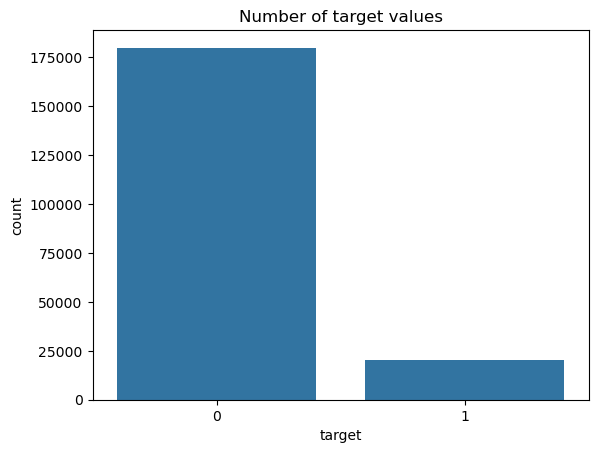

In [10]:
sns.countplot(x=data.target)
plt.title('Number of target values')

In [11]:
data.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

* The target value counts (0 & 1) are so unbalanced, we need to balance it further to avoid the bias in our model.
* There is no need to apply much EDA for this dataset.

# Data Preprocessing

## Handling Null values

In [5]:
pd.set_option('display.max_rows',None) # For displaying all the rows.
data.isnull().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0
var_75     0

* There are no null values in our dataset.

In [5]:
data1 = data[['var_0','var_1','var_2','var_3','var_4','var_5','var_6','var_7','var_8','var_9','var_10','var_11','var_12','var_13','var_14','var_15','var_16','var_17','var_18','var_19']]

* We will check for the first 20 columns as it will be so much exhausting to consider all.

## Handling Outlier

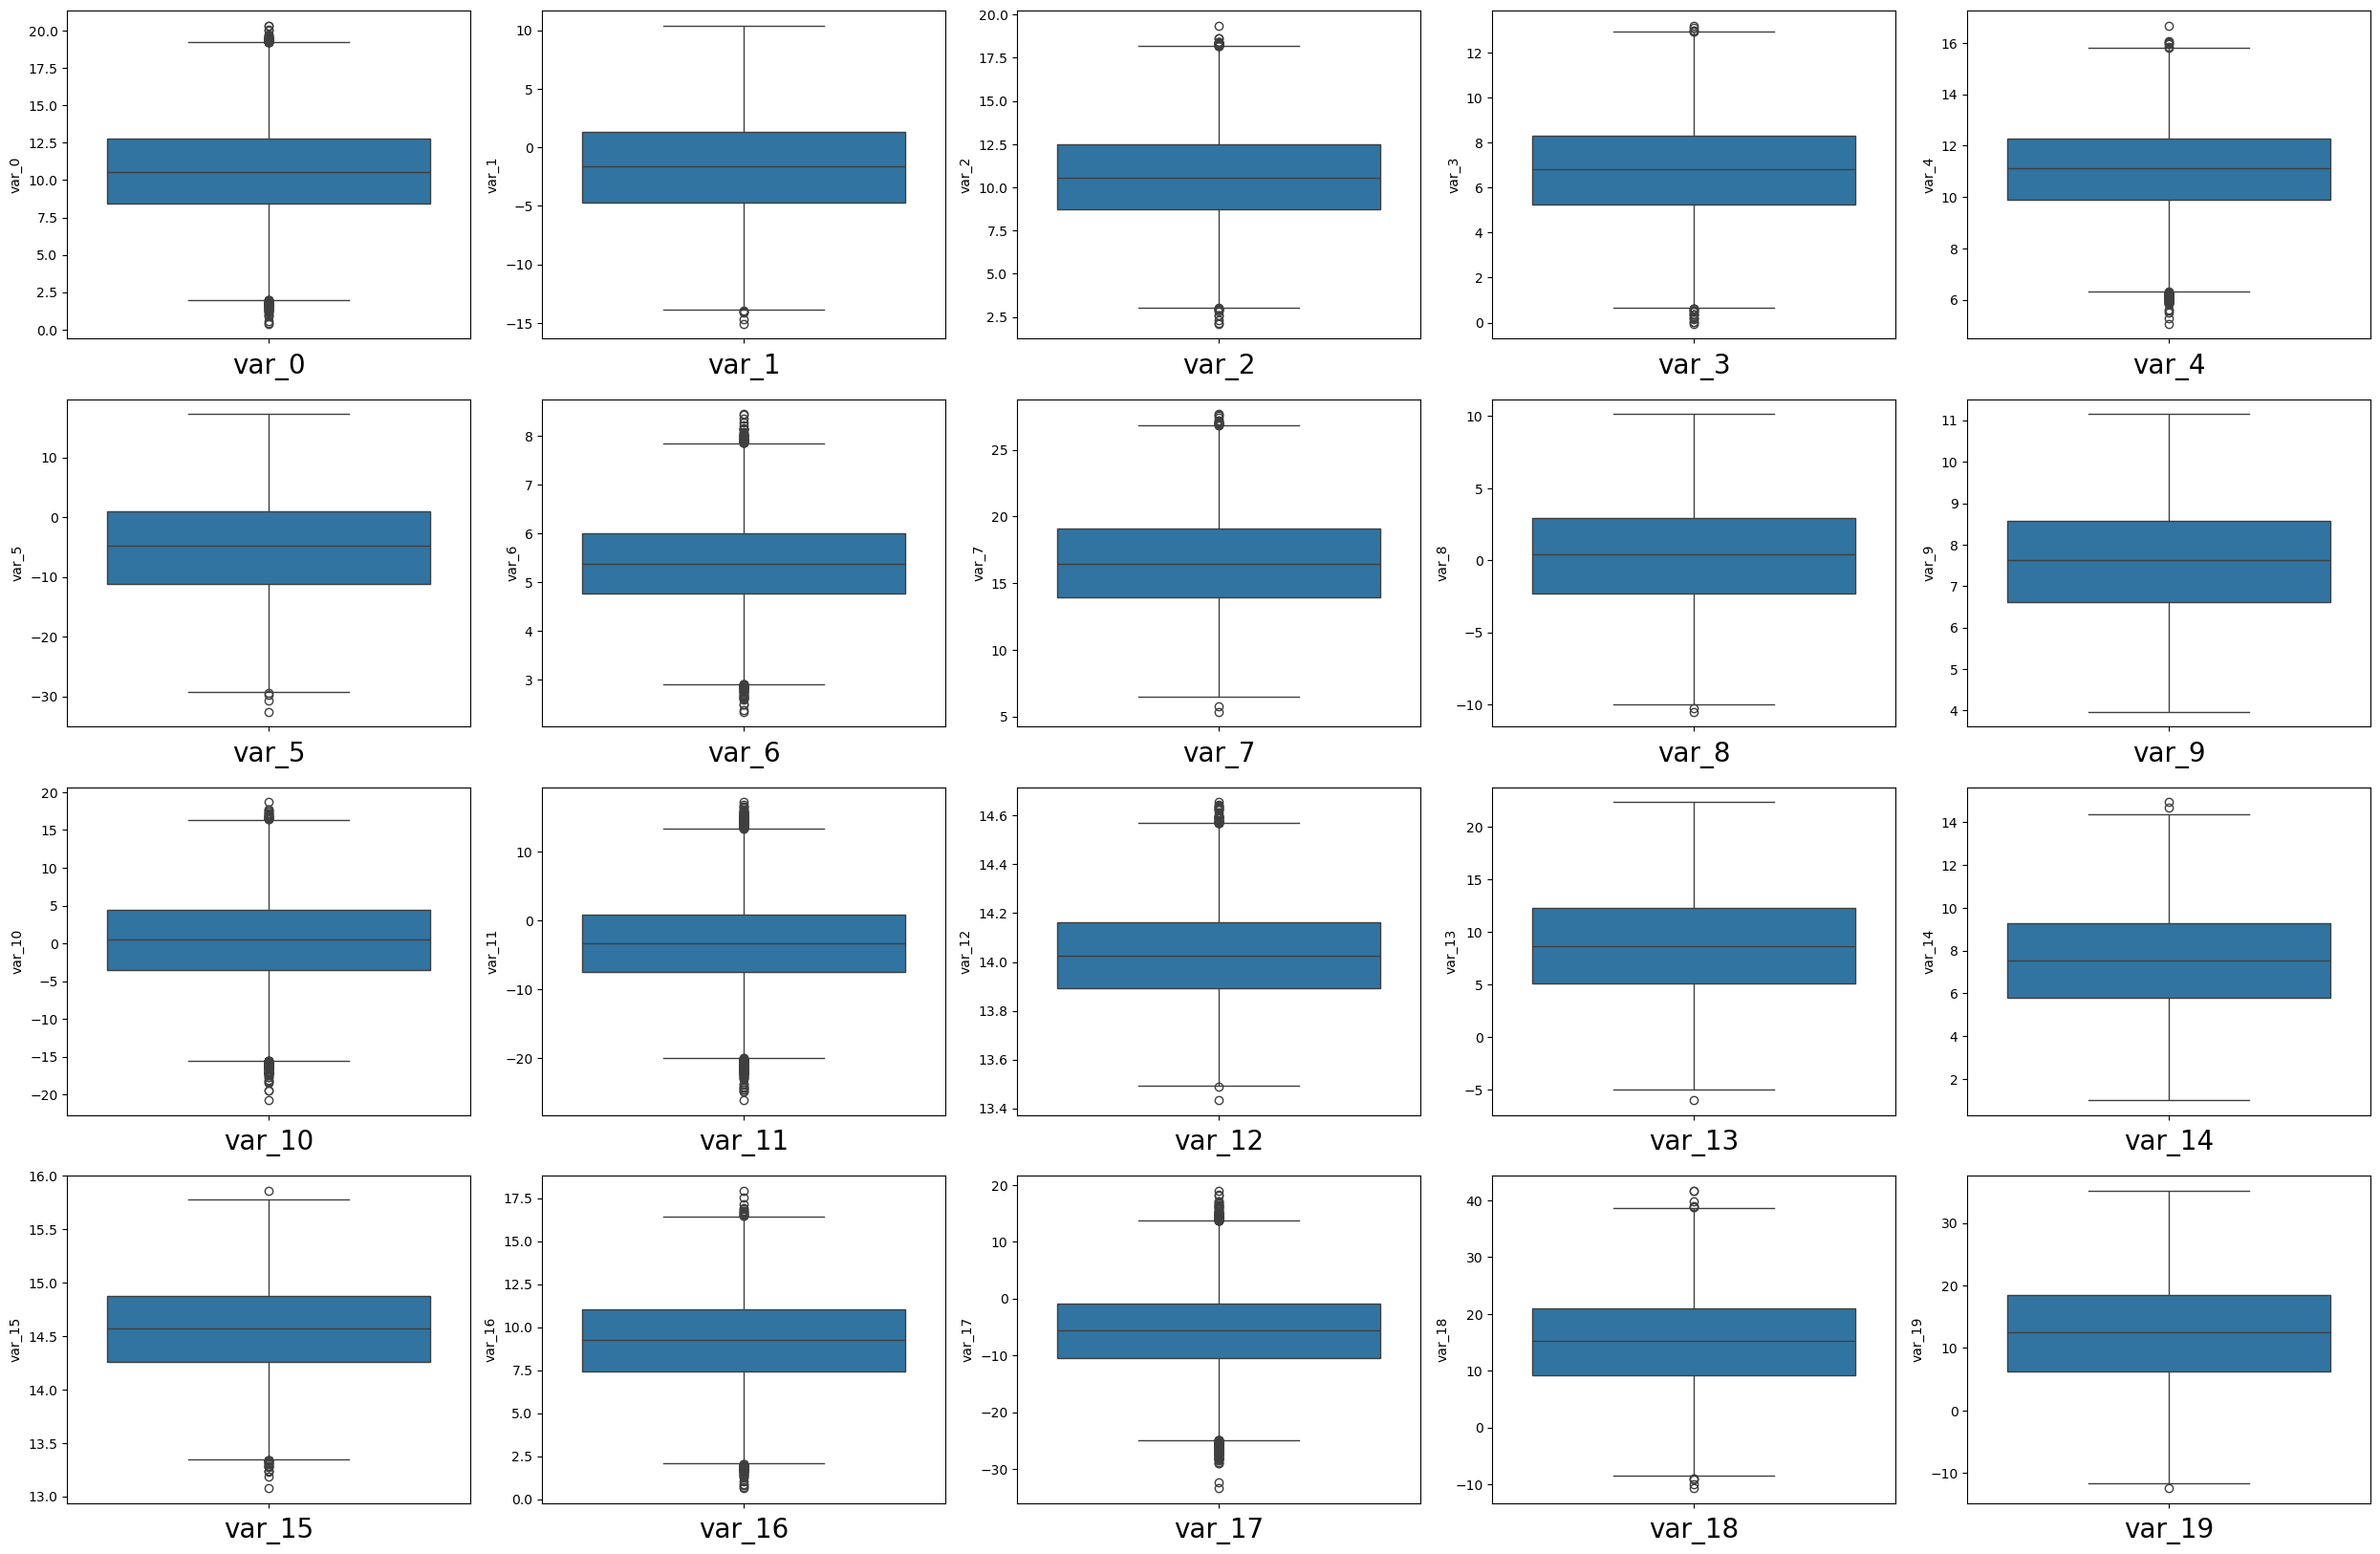

In [14]:
plt.figure(figsize=(25,20),facecolor='white')

plotnumber=1

for column in data1:
    if plotnumber<=20 :
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

* There are outliers in nearly every column so we will handle them together.

In [6]:
y=data['target'].values
x=data.drop(['target'],axis=1)
print('x.shape before IQR:',x.shape)
def IQR(df):    
    for col in df.columns:
        if col not in ('target') :            
            col_new = col + '_IQR'
            df[col_new] = df[col]
            q1, q3= np.percentile(df[col_new],[25,75])
            IQR=q3-q1
            max_IQR=q3+1.5*IQR
            min_IQR=q1-1.5*IQR
            df[col_new][df[col_new]>=max_IQR] = max_IQR
            df[col_new][df[col_new]<=min_IQR] = min_IQR
    return df
X_df=IQR(x)
print('X_df.shape:',X_df.shape)

x.shape before IQR: (200000, 200)
X_df.shape: (200000, 400)


* We augmented the dataset by introducing additional columns, denoted by the suffix '_IQR,' exclusively for those features devoid of outliers. Employing a robust method based on Interquartile Range (IQR), we implemented a custom function to identify and address outliers, replacing them with the respective maximum and minimum values within the defined acceptable range. This approach enhances the dataset's resilience to extreme values while preserving the integrity of features.

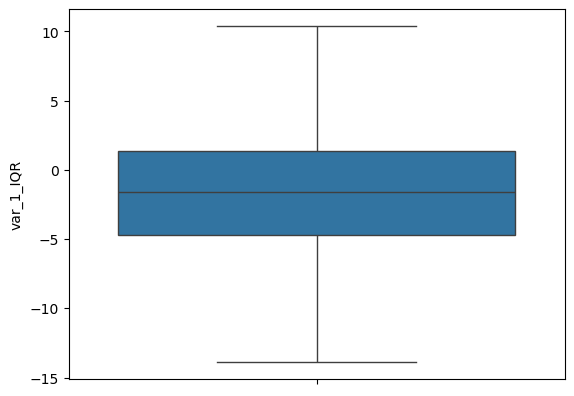

In [16]:
sns.boxplot(X_df['var_1_IQR'])
plt.show()

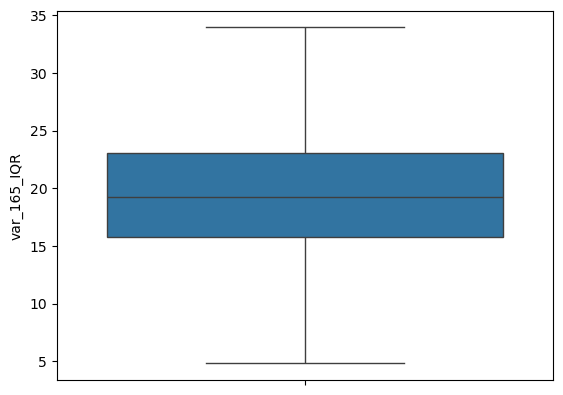

In [17]:
sns.boxplot(X_df['var_165_IQR'])
plt.show()

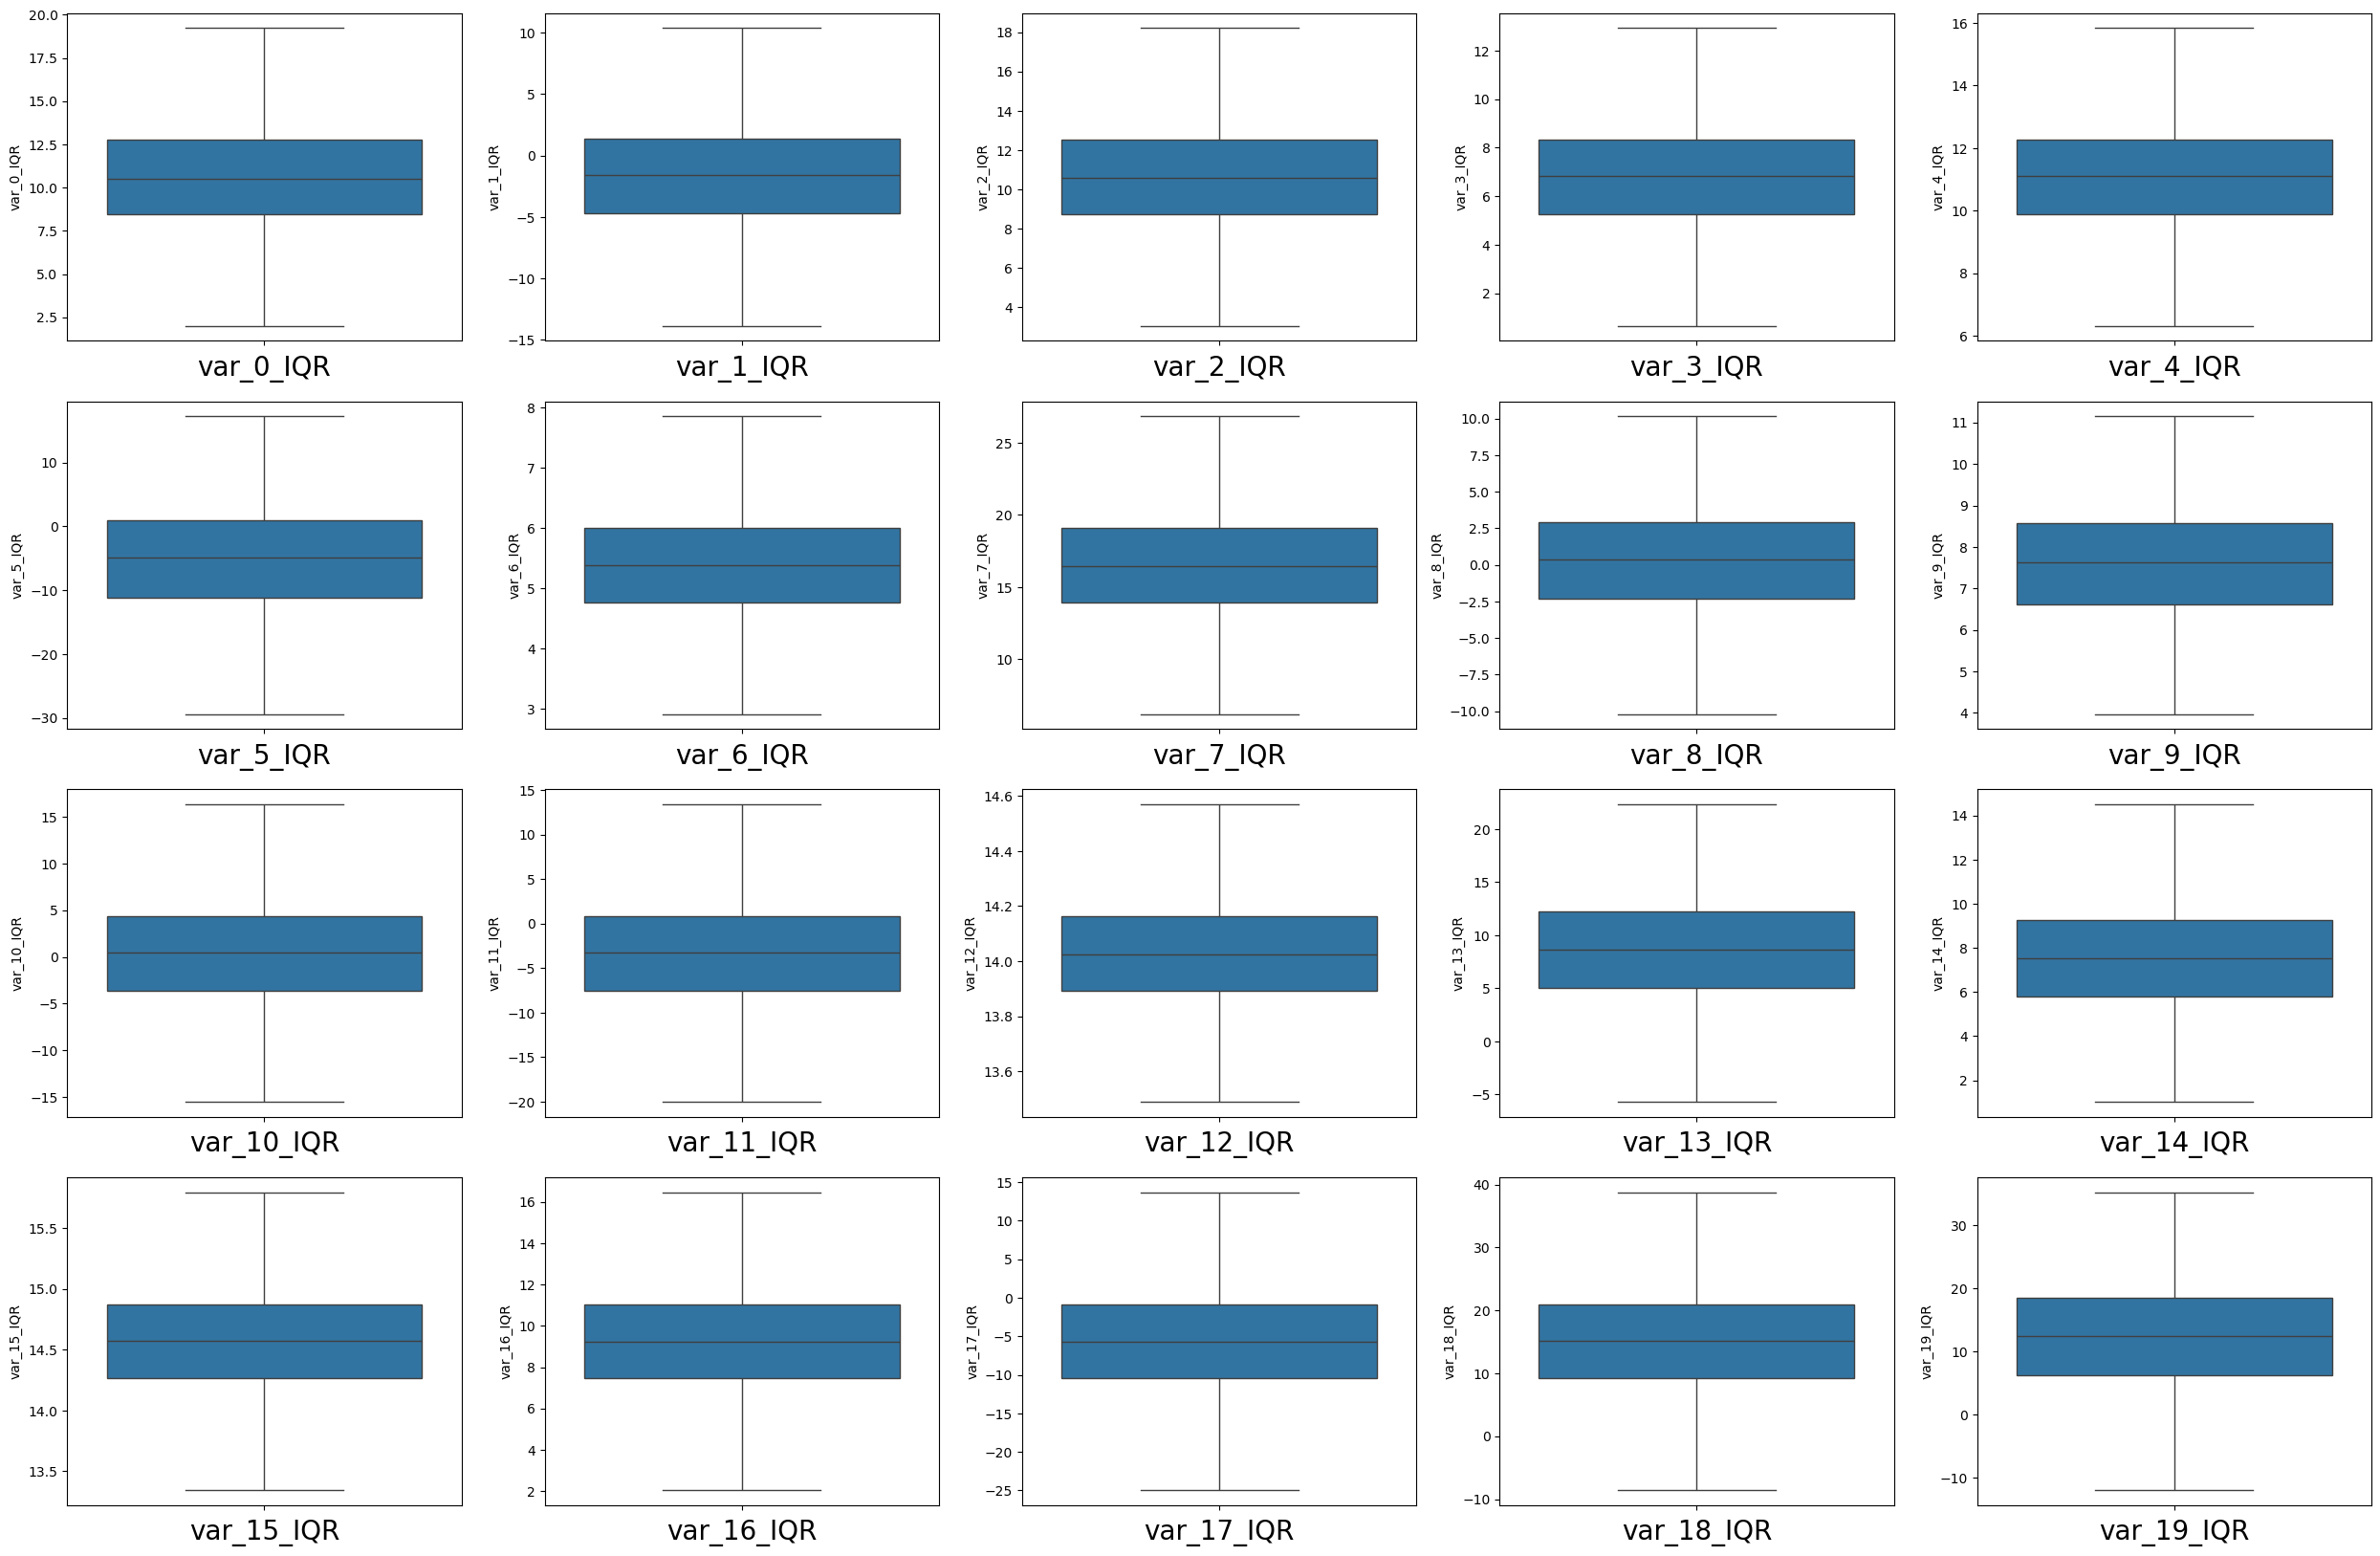

In [18]:
plt.figure(figsize=(25,20),facecolor='white')

plotnumber=1


for column in X_df.iloc[:,200:221]:
    if plotnumber<=20 :
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(X_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

* You can see that the outliers are now handled totally.

In [7]:
New_col = pd.concat([X_df.iloc[:,201:], data.target],axis=1)

* Due to system constraints, I opted to randomly select 50,000 rows from the original dataset of 200,000 entries.

In [8]:
seed_value = 42
df_sample = New_col.sample(n=50000, random_state=seed_value)

In [9]:
df_sample.head()

,var_1_IQR,var_2_IQR,var_3_IQR,var_4_IQR,var_5_IQR,var_6_IQR,var_7_IQR,var_8_IQR,var_9_IQR,var_10_IQR,...,var_191_IQR,var_192_IQR,var_193_IQR,var_194_IQR,var_195_IQR,var_196_IQR,var_197_IQR,var_198_IQR,var_199_IQR,target
119737,-4.5026,9.0662,6.4313,10.7061,-15.2857,5.1233,16.7875,4.1833,8.4055,-4.1540,...,3.3085,3.1358,5.0959,19.7160,-0.1801,5.8437,8.8348,17.0461,8.8190,0
72272,-6.1848,6.8799,2.0164,12.7998,10.2781,4.4191,15.6940,-0.6788,8.9070,-7.8677,...,3.9019,4.6616,7.6035,12.6402,-0.3037,-4.2330,9.7456,14.8337,-3.7167,0
158154,-0.8344,13.4689,3.9060,13.5984,4.6475,5.9659,24.0557,3.8743,7.6350,-4.2686,...,5.8939,0.8525,8.7406,16.6641,0.8745,7.0406,8.6424,20.7107,-5.4186,0
65426,1.2309,11.1464,9.4524,10.2142,4.0416,5.3989,20.4527,0.2915,6.3123,-6.9638,...,5.7442,2.1907,6.0651,10.9444,-2.0666,-7.9209,9.0522,17.1735,12.4656,0
30074,4.6355,15.2350,3.0718,11.8178,-15.0502,3.8357,12.0169,3.2997,6.3261,0.4133,...,5.6113,-0.1561,3.1010,17.4297,-1.0121,-6.5168,7.9772,18.5248,11.2771,1


In [10]:
#Now we can save our data frame to a csv file file1 for use in algorithms.
df_sample.to_csv('fileout.csv')

In [11]:
data_out = pd.read_csv('fileout.csv')

In [12]:
data_out.shape

(50000, 201)

## Scaling with MinMaxScaler

In [13]:
# MinMaxScaler will convert the value into the range of 0 to 1.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_data = sc.fit_transform(data_out.drop('target',axis=1))
scaled_data

array([[0.59869398, 0.39016259, 0.39764791, ..., 0.48354159, 0.56486901,
        0.69139858],
       [0.36136542, 0.32023147, 0.25359345, ..., 0.65340358, 0.43426765,
        0.49484366],
       [0.79078186, 0.54265416, 0.68774009, ..., 0.44765946, 0.78119595,
        0.46815853],
       ...,
       [0.67590014, 0.62447464, 0.78833375, ..., 0.74926333, 0.5659847 ,
        0.27378778],
       [0.73592104, 0.5652398 , 0.60369789, ..., 0.67841291, 0.47240793,
        0.52910048],
       [0.03535553, 0.69331659, 0.92085752, ..., 0.42018836, 0.58759615,
        0.60569382]])

In [14]:
df = pd.DataFrame(scaled_data, columns=[['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 'var_99', 'var_100', 'var_101', 'var_102', 'var_103', 'var_104', 'var_105', 'var_106', 'var_107', 'var_108', 'var_109', 'var_110', 'var_111', 'var_112', 'var_113', 'var_114', 'var_115', 'var_116', 'var_117', 'var_118', 'var_119', 'var_120', 'var_121', 'var_122', 'var_123', 'var_124', 'var_125', 'var_126', 'var_127', 'var_128', 'var_129', 'var_130', 'var_131', 'var_132', 'var_133', 'var_134', 'var_135', 'var_136', 'var_137', 'var_138', 'var_139', 'var_140', 'var_141', 'var_142', 'var_143', 'var_144', 'var_145', 'var_146', 'var_147', 'var_148', 'var_149', 'var_150', 'var_151', 'var_152', 'var_153', 'var_154', 'var_155', 'var_156', 'var_157', 'var_158', 'var_159', 'var_160', 'var_161', 'var_162', 'var_163', 'var_164', 'var_165', 'var_166', 'var_167', 'var_168', 'var_169', 'var_170', 'var_171', 'var_172', 'var_173', 'var_174', 'var_175', 'var_176', 'var_177', 'var_178', 'var_179', 'var_180', 'var_181', 'var_182', 'var_183', 'var_184', 'var_185', 'var_186', 'var_187', 'var_188', 'var_189', 'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195', 'var_196', 'var_197', 'var_198', 'var_199']])
df

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.598694,0.390163,0.397648,0.470864,0.461516,0.304617,0.446966,0.496102,0.725451,0.606083,...,0.345566,0.268866,0.647612,0.575638,0.592601,0.498806,0.631052,0.483542,0.564869,0.691399
1,0.361365,0.320231,0.253593,0.111348,0.681632,0.856806,0.304450,0.441297,0.480244,0.678234,...,0.421807,0.302930,0.832807,0.687162,0.212155,0.483359,0.303826,0.653404,0.434268,0.494844
2,0.790782,0.542654,0.687740,0.265223,0.765591,0.735183,0.617492,0.860376,0.709868,0.495231,...,0.488400,0.417278,0.370476,0.737734,0.428508,0.630612,0.669919,0.447659,0.781196,0.468159
3,0.327135,0.628511,0.534711,0.716880,0.409802,0.722095,0.502742,0.679798,0.529179,0.304933,...,0.627668,0.408684,0.532900,0.618742,0.120976,0.263029,0.184067,0.524086,0.572390,0.748576
4,0.150372,0.770045,0.804108,0.197292,0.578392,0.309704,0.186382,0.257005,0.680889,0.306919,...,0.538898,0.401056,0.248056,0.486916,0.469673,0.394822,0.229663,0.323601,0.652159,0.729941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.591729,0.420464,0.287158,0.573323,0.795407,0.580375,0.341061,0.501079,0.532361,0.389241,...,0.291768,0.284480,0.827891,0.603283,0.487658,0.714637,0.275976,0.697566,0.509267,0.370492
49996,0.831202,0.612319,0.569257,0.359676,0.454588,0.540231,0.854033,0.762599,0.474409,0.399010,...,0.655874,0.647036,0.721032,0.706397,0.357331,0.462449,0.593892,0.311367,0.396440,0.624834
49997,0.675900,0.624475,0.788334,0.481109,0.407836,0.558483,0.179299,0.196501,0.473900,0.704274,...,0.398122,0.654636,0.429646,0.362311,0.515998,0.472810,0.474351,0.749263,0.565985,0.273788
49998,0.735921,0.565240,0.603698,0.866211,0.298056,0.381969,0.650277,0.185280,0.352555,0.171033,...,0.451083,0.542027,0.305661,0.463148,0.430906,0.218736,0.377807,0.678413,0.472408,0.529100


In [15]:
final_data = pd.concat([df,data_out['target']],axis=1)
final_data

,"(var_0,)","(var_1,)","(var_2,)","(var_3,)","(var_4,)","(var_5,)","(var_6,)","(var_7,)","(var_8,)","(var_9,)",...,"(var_191,)","(var_192,)","(var_193,)","(var_194,)","(var_195,)","(var_196,)","(var_197,)","(var_198,)","(var_199,)",target
0,0.598694,0.390163,0.397648,0.470864,0.461516,0.304617,0.446966,0.496102,0.725451,0.606083,...,0.268866,0.647612,0.575638,0.592601,0.498806,0.631052,0.483542,0.564869,0.691399,0
1,0.361365,0.320231,0.253593,0.111348,0.681632,0.856806,0.304450,0.441297,0.480244,0.678234,...,0.302930,0.832807,0.687162,0.212155,0.483359,0.303826,0.653404,0.434268,0.494844,0
2,0.790782,0.542654,0.687740,0.265223,0.765591,0.735183,0.617492,0.860376,0.709868,0.495231,...,0.417278,0.370476,0.737734,0.428508,0.630612,0.669919,0.447659,0.781196,0.468159,0
3,0.327135,0.628511,0.534711,0.716880,0.409802,0.722095,0.502742,0.679798,0.529179,0.304933,...,0.408684,0.532900,0.618742,0.120976,0.263029,0.184067,0.524086,0.572390,0.748576,0
4,0.150372,0.770045,0.804108,0.197292,0.578392,0.309704,0.186382,0.257005,0.680889,0.306919,...,0.401056,0.248056,0.486916,0.469673,0.394822,0.229663,0.323601,0.652159,0.729941,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.591729,0.420464,0.287158,0.573323,0.795407,0.580375,0.341061,0.501079,0.532361,0.389241,...,0.284480,0.827891,0.603283,0.487658,0.714637,0.275976,0.697566,0.509267,0.370492,0
49996,0.831202,0.612319,0.569257,0.359676,0.454588,0.540231,0.854033,0.762599,0.474409,0.399010,...,0.647036,0.721032,0.706397,0.357331,0.462449,0.593892,0.311367,0.396440,0.624834,0
49997,0.675900,0.624475,0.788334,0.481109,0.407836,0.558483,0.179299,0.196501,0.473900,0.704274,...,0.654636,0.429646,0.362311,0.515998,0.472810,0.474351,0.749263,0.565985,0.273788,0
49998,0.735921,0.565240,0.603698,0.866211,0.298056,0.381969,0.650277,0.185280,0.352555,0.171033,...,0.542027,0.305661,0.463148,0.430906,0.218736,0.377807,0.678413,0.472408,0.529100,0


* Didn't get how the columns name changed from var_0 to (var_0,).
* We will solve that problem :-

In [16]:
final_data.columns = [''.join(map(str, col)) for col in final_data.columns]

In [17]:
final_data

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,0.598694,0.390163,0.397648,0.470864,0.461516,0.304617,0.446966,0.496102,0.725451,0.606083,...,0.268866,0.647612,0.575638,0.592601,0.498806,0.631052,0.483542,0.564869,0.691399,0
1,0.361365,0.320231,0.253593,0.111348,0.681632,0.856806,0.304450,0.441297,0.480244,0.678234,...,0.302930,0.832807,0.687162,0.212155,0.483359,0.303826,0.653404,0.434268,0.494844,0
2,0.790782,0.542654,0.687740,0.265223,0.765591,0.735183,0.617492,0.860376,0.709868,0.495231,...,0.417278,0.370476,0.737734,0.428508,0.630612,0.669919,0.447659,0.781196,0.468159,0
3,0.327135,0.628511,0.534711,0.716880,0.409802,0.722095,0.502742,0.679798,0.529179,0.304933,...,0.408684,0.532900,0.618742,0.120976,0.263029,0.184067,0.524086,0.572390,0.748576,0
4,0.150372,0.770045,0.804108,0.197292,0.578392,0.309704,0.186382,0.257005,0.680889,0.306919,...,0.401056,0.248056,0.486916,0.469673,0.394822,0.229663,0.323601,0.652159,0.729941,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.591729,0.420464,0.287158,0.573323,0.795407,0.580375,0.341061,0.501079,0.532361,0.389241,...,0.284480,0.827891,0.603283,0.487658,0.714637,0.275976,0.697566,0.509267,0.370492,0
49996,0.831202,0.612319,0.569257,0.359676,0.454588,0.540231,0.854033,0.762599,0.474409,0.399010,...,0.647036,0.721032,0.706397,0.357331,0.462449,0.593892,0.311367,0.396440,0.624834,0
49997,0.675900,0.624475,0.788334,0.481109,0.407836,0.558483,0.179299,0.196501,0.473900,0.704274,...,0.654636,0.429646,0.362311,0.515998,0.472810,0.474351,0.749263,0.565985,0.273788,0
49998,0.735921,0.565240,0.603698,0.866211,0.298056,0.381969,0.650277,0.185280,0.352555,0.171033,...,0.542027,0.305661,0.463148,0.430906,0.218736,0.377807,0.678413,0.472408,0.529100,0


# Feature Selection

### Heatmap

<AxesSubplot:>

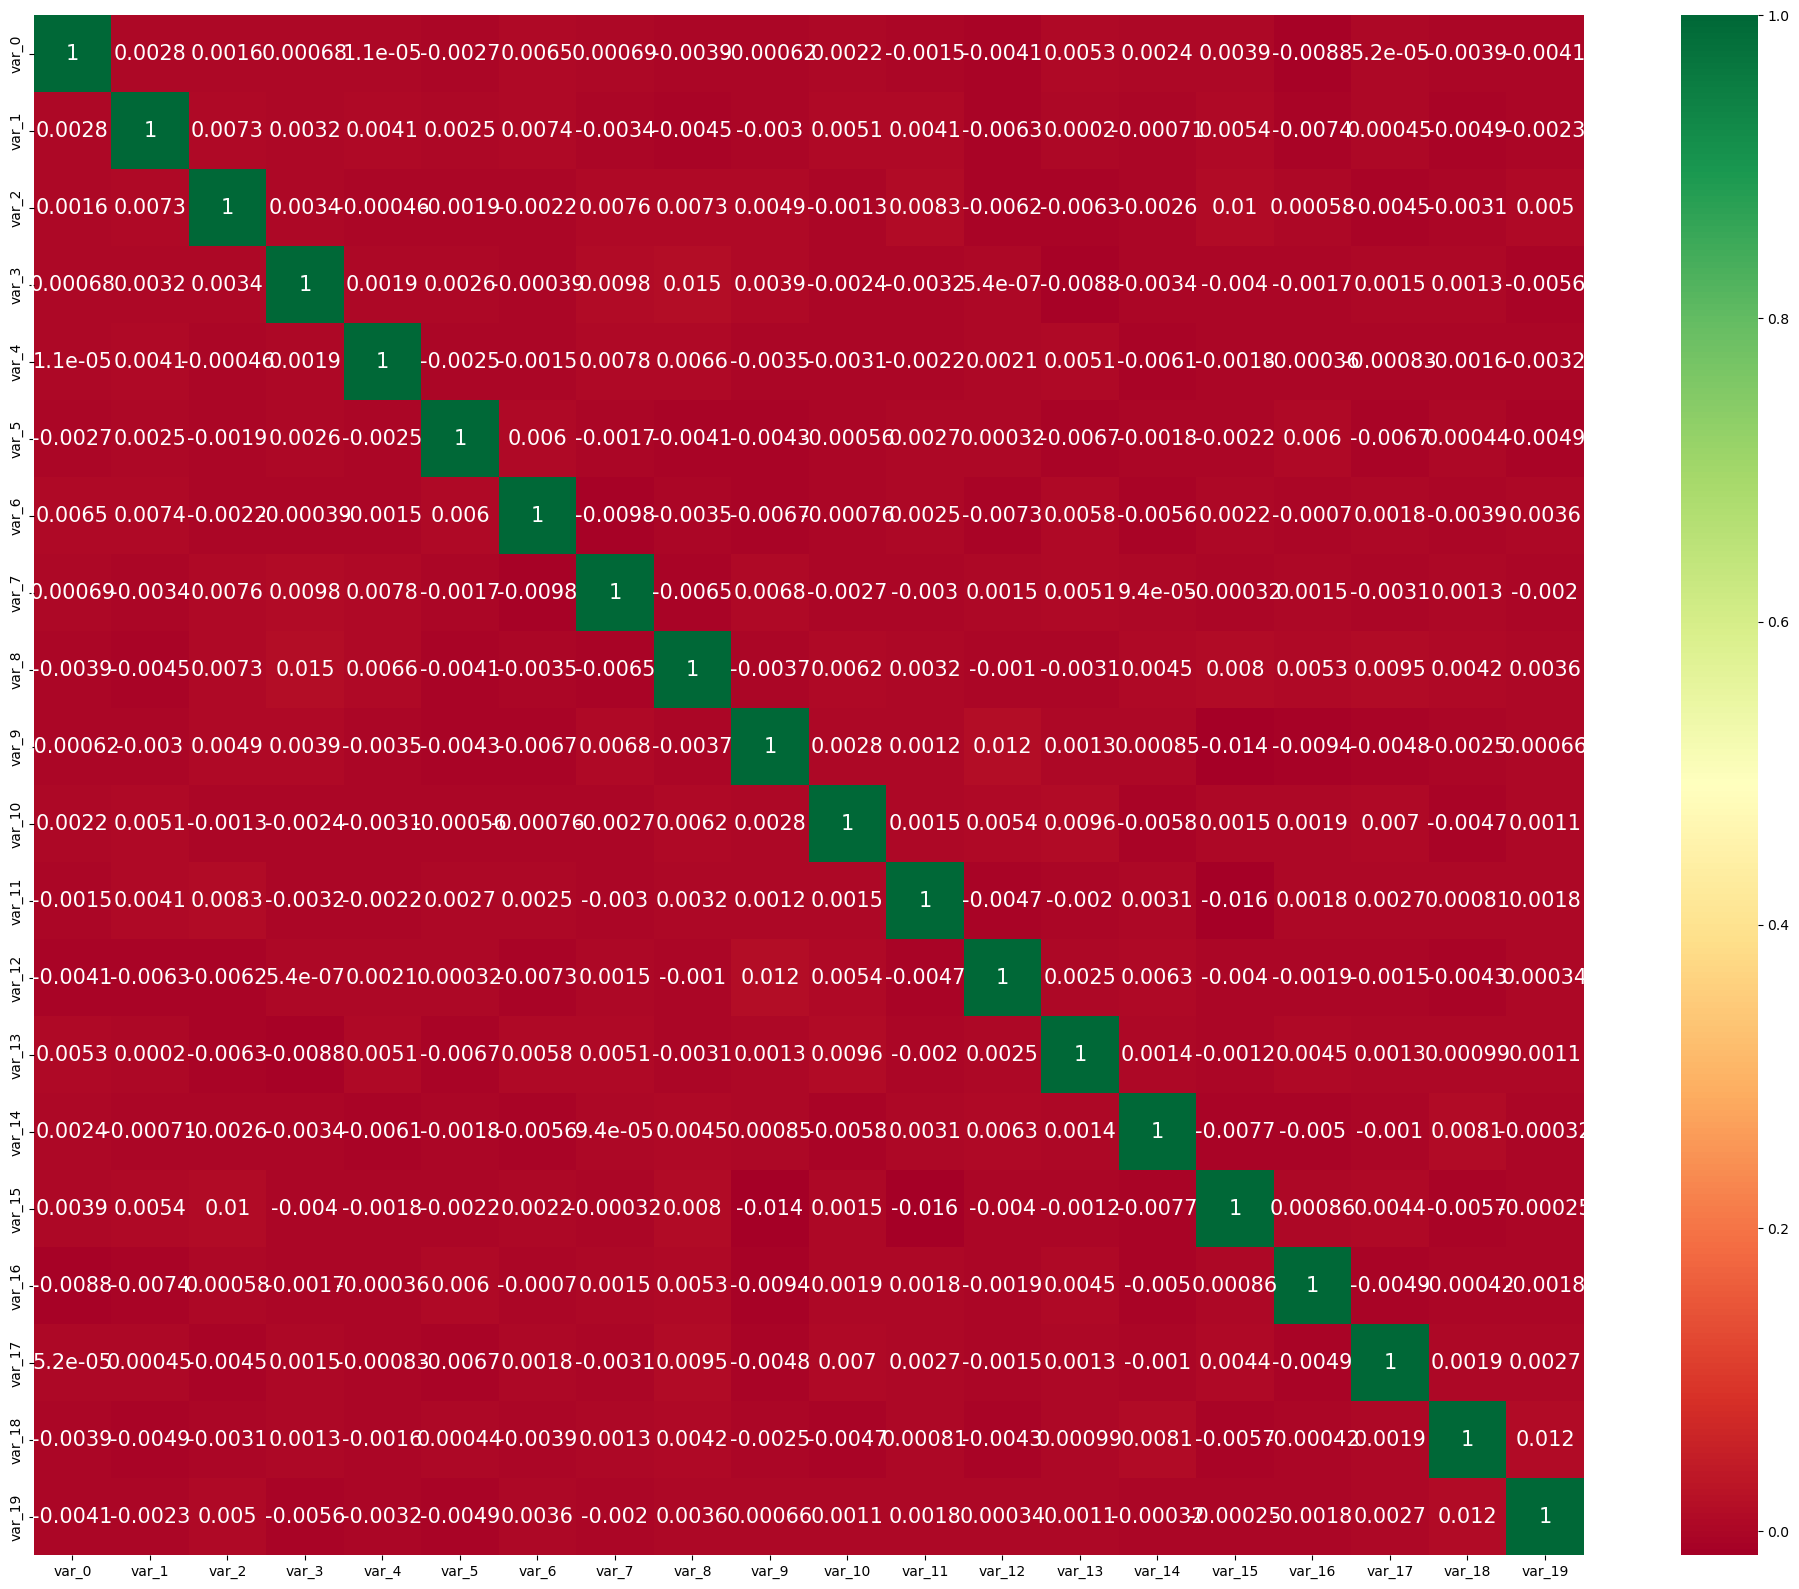

In [22]:
plt.figure(figsize=(25,20))
sns.heatmap(final_data.iloc[:,:20].corr(),annot=True,cmap="RdYlGn", annot_kws={"size":15})

* There is no correlation in first 20 columns.
* Still we will cross chech if there are any correlation in remaining columns

In [23]:
correlation_matrix = final_data.corr()

# Find pairs of columns with correlations greater than 0.9 or less than -0.9
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns
                   for col2 in correlation_matrix.columns
                   if (col1 != col2) and (correlation_matrix.loc[col1, col2] > 0.9 or correlation_matrix.loc[col1, col2] < -0.9)]

# Print the pairs of highly correlated columns
if high_corr_pairs:
    for col1, col2 in high_corr_pairs:
        print(f"Columns {col1} and {col2} have correlation: {correlation_matrix.loc[col1, col2]}")
else:
    print("No columns are highly correlated.")


No columns are highly correlated.


* From the above code, now we know for sure that there are no columns that are highly correlated. So, no need to remove any column.

# PCA (Principal Component Analysis)
* With the help of PCA we will try to reduce the dimensions of our model as our model is suffering with a curse of dimensionality.
### SCREE PLOT

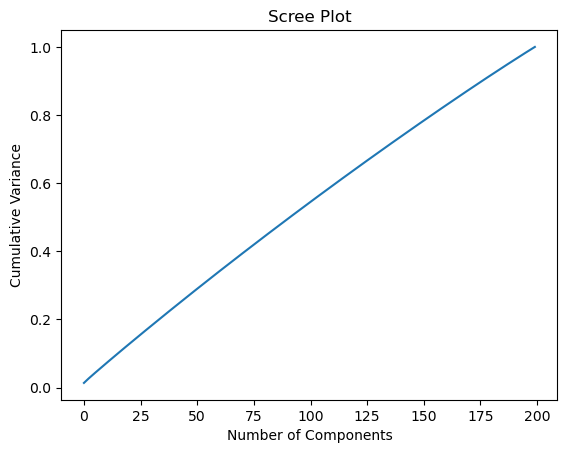

Number of components for 90% variance: 177


In [18]:
## getting the optimal number of pca
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(final_data.drop('target',axis=1))

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 90% variance
num_components_90 = np.argmax(cumulative_variance >= 0.9) + 1

# Plot the scree plot
plt.figure()
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Scree Plot')
plt.show()

print(f"Number of components for 90% variance: {num_components_90}")

* We will take 180 PC as it will cover the variance more than 90 %.
* As a result, we have decreased the column numbers from 200 to 180.

In [19]:
pca = PCA(n_components=180)
new_data = pca.fit_transform(final_data.drop('target',axis=1))
# This will be the new data fed to the algorithm.
pc_columns = [f'pc{i}' for i in range(1, 181)]
principal_Df = pd.DataFrame(data=new_data, columns=pc_columns)

In [20]:
principal_Df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc171,pc172,pc173,pc174,pc175,pc176,pc177,pc178,pc179,pc180
0,-0.107432,-0.060546,-0.350775,0.159000,-0.276068,-0.123770,-0.284367,0.186100,-0.103776,0.041760,...,0.179575,-0.372381,-0.049606,0.225609,0.063268,0.174745,0.118622,-0.163031,0.144322,-0.014675
1,0.152478,-0.023986,-0.219450,-0.096617,0.022574,-0.037444,-0.063443,-0.104586,0.373834,-0.040371,...,-0.056179,0.398860,-0.141205,0.078816,-0.108758,0.147726,0.112736,0.029888,-0.204022,0.121763
2,-0.298260,-0.320816,-0.112618,0.308067,-0.037155,-0.040418,-0.024294,0.001157,-0.250114,-0.190448,...,-0.155768,0.090725,0.215348,0.016197,-0.211855,0.079364,0.337952,-0.207869,0.228516,0.018892
3,0.169676,0.198568,-0.046102,-0.042411,0.337851,0.212713,-0.158964,0.086417,-0.241901,0.142865,...,0.176927,-0.015550,0.004704,0.075665,-0.081789,0.082994,0.084144,-0.195081,-0.019102,-0.025497
4,0.351377,-0.104429,0.335351,-0.272582,-0.079330,-0.188366,-0.037820,-0.023769,-0.017430,-0.115102,...,0.180719,-0.137098,0.127371,-0.226447,0.067047,0.133769,0.030288,-0.010212,0.081777,-0.254583


In [21]:
final_data2 = pd.concat([principal_Df, final_data.target],axis=1)
final_data2

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc172,pc173,pc174,pc175,pc176,pc177,pc178,pc179,pc180,target
0,-0.107432,-0.060546,-0.350775,0.159000,-0.276068,-0.123770,-0.284367,0.186100,-0.103776,0.041760,...,-0.372381,-0.049606,0.225609,0.063268,0.174745,0.118622,-0.163031,0.144322,-0.014675,0
1,0.152478,-0.023986,-0.219450,-0.096617,0.022574,-0.037444,-0.063443,-0.104586,0.373834,-0.040371,...,0.398860,-0.141205,0.078816,-0.108758,0.147726,0.112736,0.029888,-0.204022,0.121763,0
2,-0.298260,-0.320816,-0.112618,0.308067,-0.037155,-0.040418,-0.024294,0.001157,-0.250114,-0.190448,...,0.090725,0.215348,0.016197,-0.211855,0.079364,0.337952,-0.207869,0.228516,0.018892,0
3,0.169676,0.198568,-0.046102,-0.042411,0.337851,0.212713,-0.158964,0.086417,-0.241901,0.142865,...,-0.015550,0.004704,0.075665,-0.081789,0.082994,0.084144,-0.195081,-0.019102,-0.025497,0
4,0.351377,-0.104429,0.335351,-0.272582,-0.079330,-0.188366,-0.037820,-0.023769,-0.017430,-0.115102,...,-0.137098,0.127371,-0.226447,0.067047,0.133769,0.030288,-0.010212,0.081777,-0.254583,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.094573,-0.391158,-0.232283,0.222289,-0.124463,-0.052024,0.008424,-0.350208,0.349761,-0.202968,...,0.056020,-0.064709,0.156378,0.090868,0.252703,0.378288,-0.259374,0.232716,0.072811,0
49996,-0.363998,0.325989,0.044452,-0.067669,0.203297,-0.043834,-0.130345,0.129560,0.001117,0.239741,...,0.231960,0.149838,-0.184845,-0.043340,-0.209022,0.116096,-0.200457,-0.123874,0.068186,0
49997,-0.173971,0.222101,-0.261086,-0.099975,0.160579,0.059206,-0.075203,0.203918,-0.289683,-0.376492,...,-0.106427,-0.255410,-0.066782,0.138612,-0.005371,-0.047771,-0.068057,0.023709,-0.317680,0
49998,-0.221472,-0.010897,-0.376288,0.143810,0.174845,-0.160434,-0.216911,-0.227439,-0.273427,0.136528,...,-0.066842,-0.025979,-0.030496,0.008142,0.067019,-0.036207,0.015170,0.020060,-0.094304,0


# Model Creation

In [22]:
X=final_data2.iloc[:,:-1]
y=final_data2['target']

In [23]:
X

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc171,pc172,pc173,pc174,pc175,pc176,pc177,pc178,pc179,pc180
0,-0.107432,-0.060546,-0.350775,0.159000,-0.276068,-0.123770,-0.284367,0.186100,-0.103776,0.041760,...,0.179575,-0.372381,-0.049606,0.225609,0.063268,0.174745,0.118622,-0.163031,0.144322,-0.014675
1,0.152478,-0.023986,-0.219450,-0.096617,0.022574,-0.037444,-0.063443,-0.104586,0.373834,-0.040371,...,-0.056179,0.398860,-0.141205,0.078816,-0.108758,0.147726,0.112736,0.029888,-0.204022,0.121763
2,-0.298260,-0.320816,-0.112618,0.308067,-0.037155,-0.040418,-0.024294,0.001157,-0.250114,-0.190448,...,-0.155768,0.090725,0.215348,0.016197,-0.211855,0.079364,0.337952,-0.207869,0.228516,0.018892
3,0.169676,0.198568,-0.046102,-0.042411,0.337851,0.212713,-0.158964,0.086417,-0.241901,0.142865,...,0.176927,-0.015550,0.004704,0.075665,-0.081789,0.082994,0.084144,-0.195081,-0.019102,-0.025497
4,0.351377,-0.104429,0.335351,-0.272582,-0.079330,-0.188366,-0.037820,-0.023769,-0.017430,-0.115102,...,0.180719,-0.137098,0.127371,-0.226447,0.067047,0.133769,0.030288,-0.010212,0.081777,-0.254583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.094573,-0.391158,-0.232283,0.222289,-0.124463,-0.052024,0.008424,-0.350208,0.349761,-0.202968,...,-0.007550,0.056020,-0.064709,0.156378,0.090868,0.252703,0.378288,-0.259374,0.232716,0.072811
49996,-0.363998,0.325989,0.044452,-0.067669,0.203297,-0.043834,-0.130345,0.129560,0.001117,0.239741,...,-0.057432,0.231960,0.149838,-0.184845,-0.043340,-0.209022,0.116096,-0.200457,-0.123874,0.068186
49997,-0.173971,0.222101,-0.261086,-0.099975,0.160579,0.059206,-0.075203,0.203918,-0.289683,-0.376492,...,0.273541,-0.106427,-0.255410,-0.066782,0.138612,-0.005371,-0.047771,-0.068057,0.023709,-0.317680
49998,-0.221472,-0.010897,-0.376288,0.143810,0.174845,-0.160434,-0.216911,-0.227439,-0.273427,0.136528,...,0.149015,-0.066842,-0.025979,-0.030496,0.008142,0.067019,-0.036207,0.015170,0.020060,-0.094304


In [24]:
y

0        0
1        0
2        0
3        0
4        1
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: target, Length: 50000, dtype: int64

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [26]:
X_train.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc171,pc172,pc173,pc174,pc175,pc176,pc177,pc178,pc179,pc180
20597,-0.283223,0.030514,0.006588,-0.095085,-0.027112,-0.093619,-0.266133,0.058069,0.305129,0.008948,...,-0.084984,0.011215,0.289342,-0.054087,-0.247706,-0.075735,-0.024566,0.024828,0.106610,0.086169
156,-0.065322,0.100161,0.239341,0.027336,0.002253,0.104993,0.164443,-0.247222,0.005471,-0.183122,...,-0.122685,0.135489,-0.078375,-0.208642,-0.196295,-0.097205,0.011652,0.142078,-0.423464,-0.085701
11276,0.310656,-0.149900,0.043307,0.009300,0.093778,0.016727,0.034719,-0.043792,-0.054074,-0.321757,...,-0.121364,-0.134842,0.300686,0.044785,-0.219307,0.137412,0.070396,-0.023412,0.216516,0.064507
47211,-0.461668,0.279390,-0.010309,-0.294691,-0.177471,-0.301830,0.158715,-0.163744,0.035103,-0.028969,...,-0.047997,0.061978,-0.370943,0.113359,-0.025083,0.111038,-0.069071,0.129059,-0.029570,-0.095282
34187,0.153871,0.156617,-0.007908,0.133154,-0.165361,0.060297,-0.289588,0.059411,0.270557,-0.429598,...,0.123262,0.012925,-0.245028,-0.040569,0.019811,-0.008628,0.000220,0.126058,-0.163206,-0.145051


In [27]:
y_train.head()

20597    0
156      0
11276    0
47211    0
34187    0
Name: target, dtype: int64

In [28]:
y_train.value_counts()

0    35938
1     4062
Name: target, dtype: int64

* We can see that the classes are imbalanced in the training data, so we will balance it using an oversampling technique i.e. Smoting.

### Smoting Technique

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [30]:
y_train_smote.value_counts()

0    35938
1    35938
Name: target, dtype: int64

* Now the classes are balanced and we can move further.

# Model Evaluation

## Logistic Regression Algorithm

In [51]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,classification_report

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_smote,y_train_smote)
LR_y_train_predict=LR.predict(X_test)
accuracy = accuracy_score(y_test,LR_y_train_predict)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test,LR_y_train_predict)
print("\n",classification)

Accuracy: 78.48 %

               precision    recall  f1-score   support

           0       0.97      0.79      0.87      8942
           1       0.30      0.76      0.43      1058

    accuracy                           0.78     10000
   macro avg       0.63      0.77      0.65     10000
weighted avg       0.89      0.78      0.82     10000



### Cross validation on Logistic Regression

In [52]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(LR, X, y, cv=10, scoring='accuracy')

print("Cross Validation Score of Logistic Regression:", scores.mean())
print("Std:", scores.std())
print("Accuracy : ",scores.mean()*100,"%")

Cross Validation Score of Logistic Regression: 0.91236
Std: 0.002455687276507315
Accuracy :  91.23599999999999 %


# KNN (K-Nearest Neighbor)

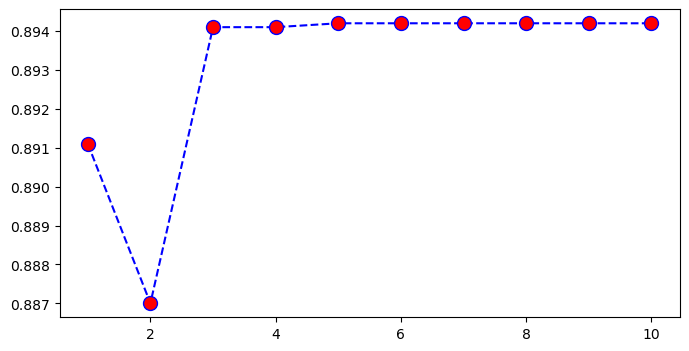

In [54]:
# Knn 

from sklearn.neighbors import KNeighborsClassifier
error_rate =[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_smote, y_train_smote)
    y_new = knn.predict(X_test)
    error_rate.append(np.mean(y_new != y_test))
    
plt.figure(figsize=(8,4))
plt.plot(range(1,11),error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [56]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train_smote, y_train_smote)
y_new = knn1.predict(X_test)
accuracy = accuracy_score(y_test, y_new)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_new)
print("\n",classification)

Accuracy: 10.58 %

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8942
           1       0.11      1.00      0.19      1058

    accuracy                           0.11     10000
   macro avg       0.05      0.50      0.10     10000
weighted avg       0.01      0.11      0.02     10000



### Cross Validation on KNN

In [58]:
scores = cross_val_score(knn1, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of KNN:", scores.mean())
print("Std:", scores.std())
print("Accuracy : ",scores.mean()*100,"%")

Cross Validation Score of KNN: 0.8976200000000001
Std: 0.00018867962264115484
Accuracy :  89.76200000000001 %


## SVM (Support Vector Machine) Algorithm

In [29]:
# Support Vector Machine

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_smote, y_train_smote)
y_hat = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 89.24 %

               precision    recall  f1-score   support

           0       0.91      0.97      0.94      8942
           1       0.48      0.21      0.29      1058

    accuracy                           0.89     10000
   macro avg       0.70      0.59      0.62     10000
weighted avg       0.87      0.89      0.87     10000



### Cross Validation on SVC

In [61]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')

print("Cross Validation Score of SVC:", scores.mean())
print("Std:", scores.std())
print("Accuracy : ",scores.mean()*100,"%")

Cross Validation Score of SVC: 0.9116000000000002
Std: 0.0017458522274235873
Accuracy :  91.16000000000003 %


## Decision tree Classifier Algorithm

In [39]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,classification_report
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() 
dt.fit(X_train_smote, y_train_smote)
y_hat=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 76.96 %

               precision    recall  f1-score   support

           0       0.92      0.81      0.86      8942
           1       0.21      0.44      0.29      1058

    accuracy                           0.77     10000
   macro avg       0.57      0.62      0.58     10000
weighted avg       0.85      0.77      0.80     10000



### Cross Validation on Decision Tree Classifier

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Decision Tree Classifier:", scores.mean())
print("Std:", scores.std())
print("Accuracy : ",scores.mean()*100,"%")

Cross Validation Score of Decision Tree Classifier: 0.85448
Std: 0.006305679979193371
Accuracy :  85.44800000000001 %


# Randomized Search CV on Decision Tree

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=3)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=tree_clf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the randomized search to the data
random_search.fit(X_train_smote, y_train_smote)

# Print the best parameters found by the randomized search
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_tree_clf = random_search.best_estimator_
y_hat = best_tree_clf.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:", accuracy * 100, "%")


Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
Accuracy: 77.21000000000001 %


### Decision Tree with best hyperparameter

In [47]:
dt1=DecisionTreeClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 2, min_samples_split= 10, splitter= 'best')
dt1.fit(X_train,y_train)
y_hat1=dt1.predict(X_test)
acc2=accuracy_score(y_test,y_hat1)
print("Accuracy:",acc2*100,"%")

Accuracy: 85.11999999999999 %


## Random Forest Classifier Algorithm

In [42]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train_smote,y_train_smote)
y_predict=rf_clf.predict(X_test)
acc2=accuracy_score(y_test,y_predict)
print("Accuracy:",acc2*100,"%")

classification = classification_report(y_test, y_predict)
print("\n",classification)

Accuracy: 88.0 %

               precision    recall  f1-score   support

           0       0.91      0.96      0.93      8942
           1       0.36      0.18      0.24      1058

    accuracy                           0.88     10000
   macro avg       0.64      0.57      0.59     10000
weighted avg       0.85      0.88      0.86     10000



### Cross Validation on Random Forest

In [43]:
scores = cross_val_score(rf_clf, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Random Forest:", scores.mean())
print("Std:", scores.std())
print("Accuracy : ",scores.mean()*100,"%")

Cross Validation Score of Random Forest: 0.9014
Std: 0.0012231107881136593
Accuracy :  90.14 %


### Randomized Search CV with Random Forest (Hyperparameter Tuning)

In [44]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=10, cv=3, 
                               verbose=1, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best params: {rf_best_params})")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False})


### Random Forest with best hyperparameter

In [45]:
rf_clf2 = RandomForestClassifier(n_estimators= 400, min_samples_split= 10, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 60, bootstrap= False) #passing best parameter to randomforest
rf_clf2.fit(X_train_smote, y_train_smote) #training 
y_predict=rf_clf2.predict(X_test) #testing
acc=accuracy_score(y_test,y_predict)
print("Accuracy:",acc*100,"%")

Accuracy: 88.75 %


## Gradient Boosting Algorithm

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train_smote,y_train_smote) ## fitting the data
y_gbm=gbm.predict(X_test)
accu_scor=accuracy_score(y_test,y_gbm)
print("Accuracy:",accu_scor*100,"%")

classification = classification_report(y_test, y_gbm)
print("\n",classification)

Accuracy: 78.86999999999999 %

               precision    recall  f1-score   support

           0       0.96      0.80      0.87      8942
           1       0.29      0.70      0.41      1058

    accuracy                           0.79     10000
   macro avg       0.62      0.75      0.64     10000
weighted avg       0.89      0.79      0.82     10000



### Cross Validation on Gradient Boosting

In [49]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(gbm, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Gradient Boosting:", scores.mean())
print("Std:", scores.std())
print("Accuracy : ",scores.mean()*100,"%")

Cross Validation Score of Gradient Boosting: 0.9093600000000002
Std: 0.0019673332203772728
Accuracy :  90.93600000000002 %


## XGBoost Algorithm

In [50]:
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train_smote,y_train_smote)# fitting the data
y_hat=xgb_r.predict(X_test)
accu_scor=accuracy_score(y_test,y_hat)
print("Accuracy:",accu_scor*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 85.55 %

               precision    recall  f1-score   support

           0       0.92      0.91      0.92      8942
           1       0.33      0.37      0.35      1058

    accuracy                           0.86     10000
   macro avg       0.63      0.64      0.63     10000
weighted avg       0.86      0.86      0.86     10000



### Cross Validation on XgBoost

In [51]:
scores = cross_val_score(xgb_r, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of XgBoost:", scores.mean())
print("Std:", scores.std())
print("Accuracy : ",scores.mean()*100,"%")

Cross Validation Score of XgBoost: 0.9076599999999999
Std: 0.002313525448314755
Accuracy :  90.76599999999999 %


### Randomized Search CV with XGBoost (Hyperparameter Tuning)

In [52]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=10, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(X_train, y_train)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best paramters: {'reg_lambda': 12.8, 'reg_alpha': 12.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.7, 'gamma': 0})


### XGBoost with best hyperparameter

In [53]:
XGB2 = XGBClassifier(reg_lambda=12.8, reg_alpha=12.8, n_estimators=100, max_depth=6, learning_rate=0.7, gamma=0)
XGB2.fit(X_train, y_train)  # Training
y_predict = XGB2.predict(X_test)  # Testing
acc = accuracy_score(y_test,y_predict) 
print("Accuracy:",acc*100,"%")

Accuracy: 90.11 %


## ANN (Artificial Neural Network)

In [32]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2)
model.fit(X_train_smote,y_train_smote) 
y_predict = model.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_predict)*100,"%")

classification = classification_report(y_test, y_predict)
print("\n",classification)

Accuracy : 83.7 %

               precision    recall  f1-score   support

           0       0.92      0.89      0.91      8942
           1       0.29      0.38      0.33      1058

    accuracy                           0.84     10000
   macro avg       0.61      0.64      0.62     10000
weighted avg       0.86      0.84      0.85     10000



### Grid Search on ANN (Hyperparameter Tuning)

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
}

# Create an ANN classifier
mlp = MLPClassifier(max_iter=50)

# Perform GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
Best Accuracy Score:  0.9126800000000002


### ANN with best hyperparameter

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Instantiate MLPClassifier with specified hyperparameters
ANN1 = MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), learning_rate='constant', solver='sgd')

# Training
ANN1.fit(X_train, y_train)

# Testing
y_predict = ANN1.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_predict)
print("Accuracy:", acc * 100, "%")

Accuracy: 91.03 %


# Model Comparison Report

* Logistic Regression :- 78.48 %
* Cross validation on logistic regression :- 91.23 %


* K-Nearest Neighbor :- 10.58 %
* Cross validation on KNN :- 89.76 %


* Support Vector Classifier :- 89.24 %
* Cross validation on SVC :- 91.16 %


* Decision Tree Classifier :- 76.96 %
* Cross validation on Decision Tree Classifier :- 85.44 %
* Decision Tree with best hyperparameter :- 85.11 %


* Random Forest Classifier :- 88.00 %
* Cross validation on Random Forest Classifier :- 90.14 %
* Random Forest with best hyperparameter :- 88.75 %


* Gradient Boosting :- 78.86 %
* Cross validation on Gradient Boosting :- 90.93 %


* XGBoost :- 85.55 %
* Cross validation on XGBoost :- 90.76 %
* XGBoost with best hyperparameter :- 90.11 %


* Artificial Neural Network :- 83.7 % 
* ANN with best hyperparameter :- 91.03 %

##### The best accuracy is given by the Logistic Regression with applying the cross validation on it i.e. 91.23 %


# Data Analysis Report

In the data analysis report, I conducted an analysis on a reduced sample of 50,000 rows from a dataset originally consisting of 2 million rows and 202 columns. The target variable, a binary classification task, exhibited imbalance, which I addressed through the application of SMOTE for oversampling. The 'ID_code' column was excluded from the analysis as it didn't influence the target variable. To enhance data quality, outliers were detected and treated in each column. Furthermore, for dimensionality reduction, Principal Component Analysis (PCA) was applied. This preprocessing ensures a more manageable dataset for subsequent modeling, with a balanced target variable and improved feature representation.

# Report on Challenges faced 
Challenges were encountered during the analysis, notably in the time-intensive execution of various models, particularly during hyperparameter tuning. The large dataset size, even after downsampling, posed computational constraints, leading to extended processing times. Balancing the trade-off between model complexity and computational efficiency became a crucial aspect of the analysis. Despite these challenges, the implementation of robust hyperparameter tuning strategies was essential for optimizing model performance on the reduced dataset.

# Conclusion
In summary, the analysis highlighted logistic regression as the optimal model for predicting future transactions, achieving a notable accuracy of 91.23% through cross-validation. However, it's essential to note that the execution time was prolonged due to the downsizing of rows and the application of PCA for dimensionality reduction. Despite the time-consuming nature of these processes, the trade-off between computational efficiency and model accuracy was carefully managed, resulting in a successful identification and validation of an effective predictive model for the binary classification task.

# Thank you for taking the time to review this project.

Best regards,

Vinay D Gaikwad